In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from IPython.display import SVG,display


In [5]:
file = pd.read_csv("car data.csv")

In [9]:
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
file.shape

(301, 9)

In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
file.duplicated().sum()

2

In [19]:
file.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

* The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
* There are 301 rows and 9 columns provided in the data.
* 2 duplicate rows present in the dataset.
* Null values not exist in the dataset.

In [21]:
file.describe(include= 'all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [25]:
file.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [27]:
file['Current Year'] = 2024
file['no_year'] = file['Current Year'] - file['Year']

In [29]:
# Removing the 'Current Year' column as it's no longer needed
file.drop(['Current Year'], axis=1, inplace=True)

In [31]:
# New updated DataFrame
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [35]:
dep_var = ['Selling_Price']

## Vizualization

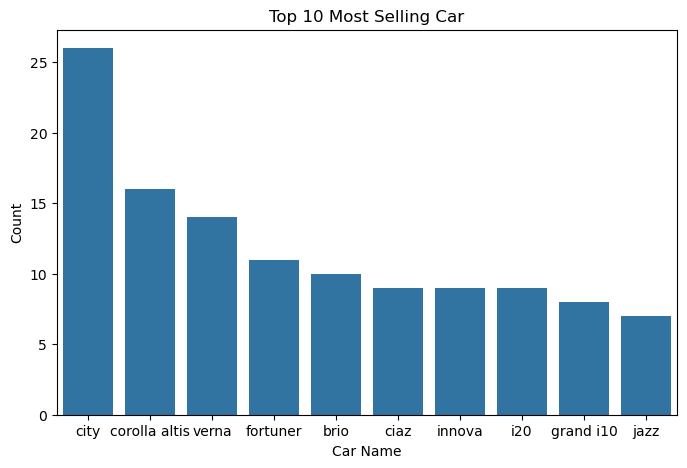

In [38]:
top10 = file['Car_Name'].value_counts()[:10]
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=file, order=top10.index)
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')
plt.show()

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

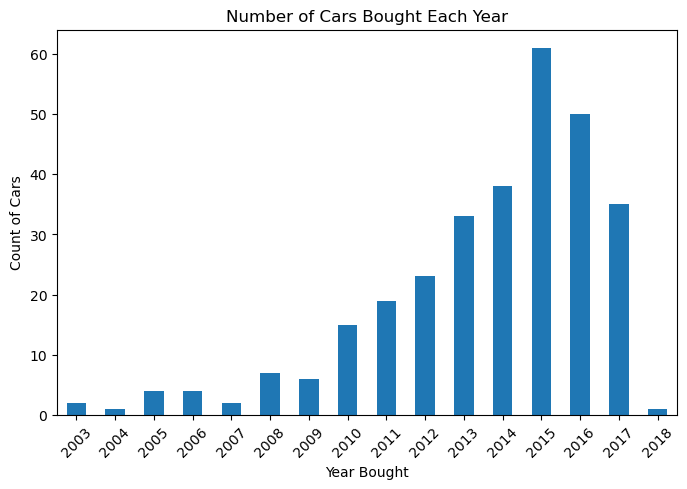

In [40]:
plt.figure(figsize=(8, 5))
yearly_counts = file.groupby('Year').count()['Car_Name']
yearly_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')
plt.show()

From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

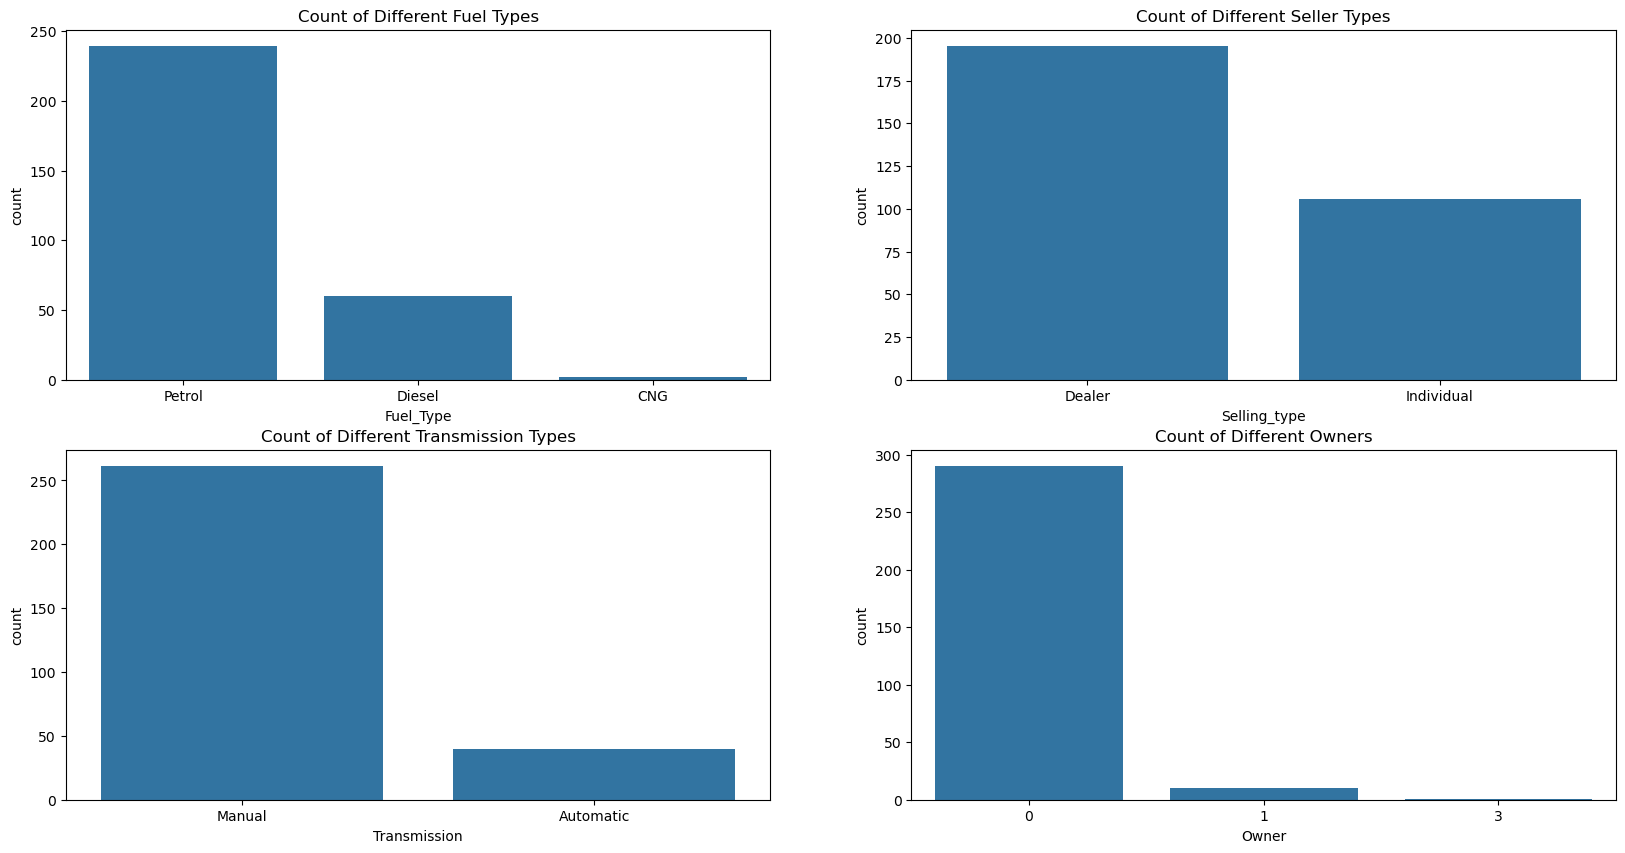

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data=file, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")
plt.subplot(2,2,2)
sns.countplot(data=file, x = 'Selling_type')
plt.title("Count of Different Seller Types")
plt.subplot(2,2,3)
sns.countplot(data=file, x = 'Transmission')
plt.title("Count of Different Transmission Types")
plt.subplot(2,2,4)
sns.countplot(data=file, x = 'Owner')
plt.title("Count of Different Owners")
plt.show()

* The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
* We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
* We clearly see that Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

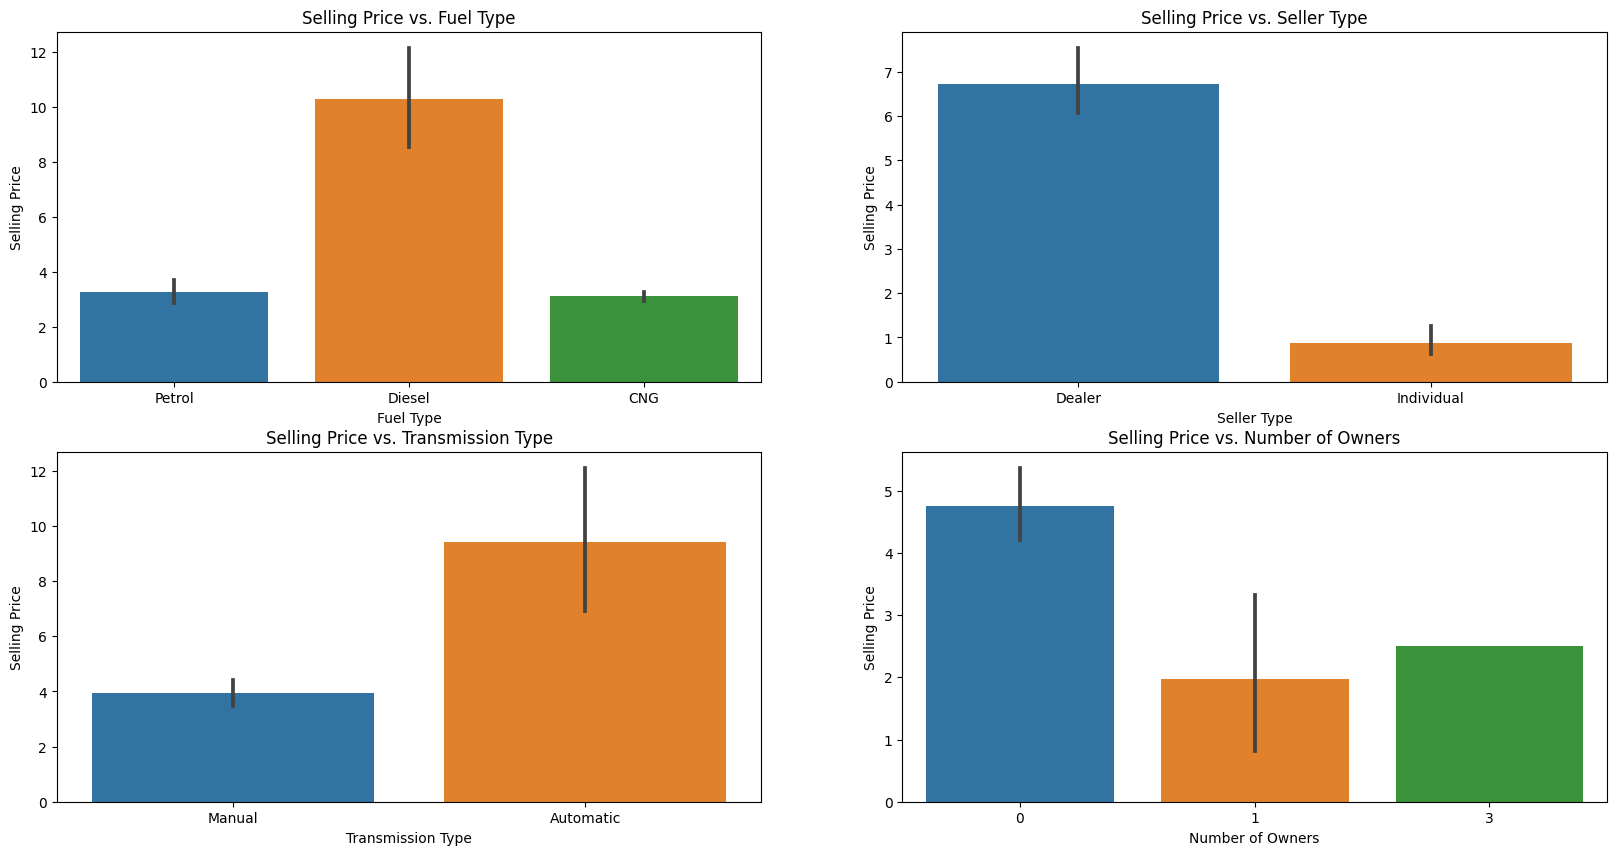

In [ ]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
* The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
* The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
* First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

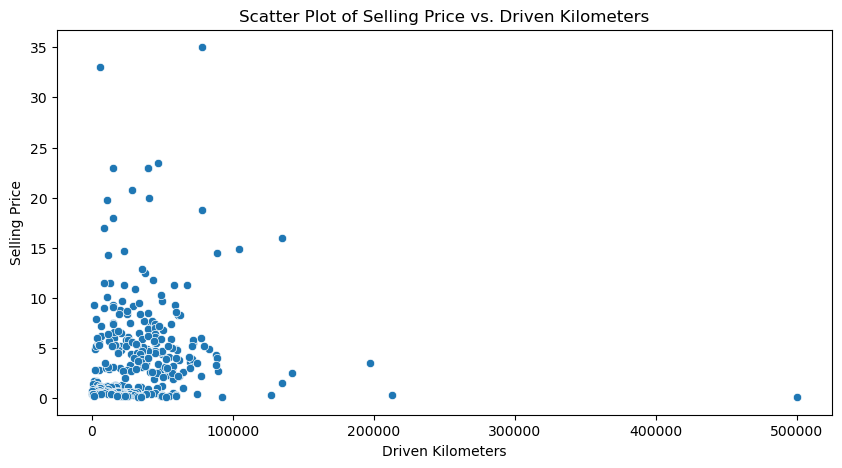

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=file, x='Driven_kms', y='Selling_Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')
plt.show()

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

## Feature Engineering

In [50]:
q1, q3, median = file.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
file['Selling_Price'] = np.where(file['Selling_Price'] > upper_limit, median,np.where(file['Selling_Price'] < lower_limit,median,file['Selling_Price']))
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = file[col].quantile(0.99)
  file[col] = np.where(file[col] > upper_limit, upper_limit, file[col])

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

In [52]:
file.drop(['Car_Name'], axis=1, inplace=True)

In [56]:
file = pd.get_dummies(file)

One hot encoding is used to encode the categorical variables into numerical format.

<Figure size 1000x500 with 0 Axes>

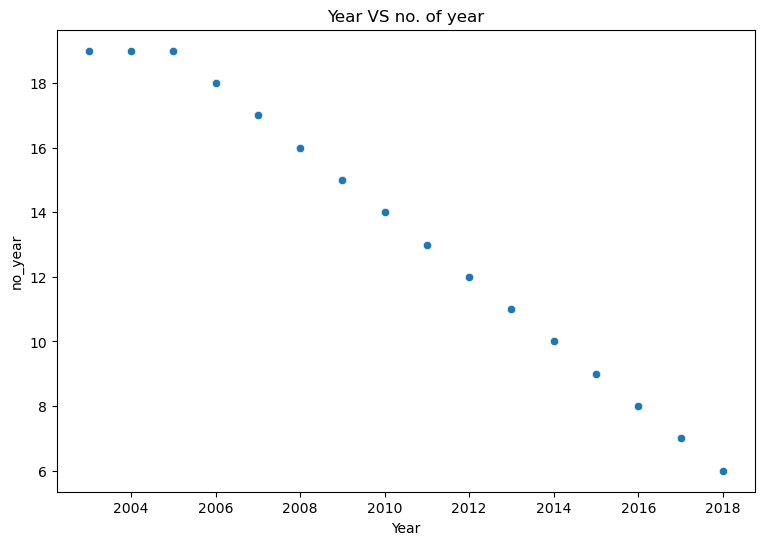

In [60]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=file)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [62]:
file[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [64]:
file.drop(['Year'], axis=1, inplace=True)

In [68]:
features = [i for i in file.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [72]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [74]:
continuous_feature_file = pd.DataFrame(file[continuous_variables])

In [76]:
continuous_feature_file

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,10.0
1,9.54,43000.0,0.0,11.0
2,9.85,6900.0,0.0,7.0
3,4.15,5200.0,0.0,13.0
4,6.87,42450.0,0.0,10.0
...,...,...,...,...
296,11.60,33988.0,0.0,8.0
297,5.90,60000.0,0.0,9.0
298,11.00,87934.0,0.0,15.0
299,12.50,9000.0,0.0,7.0


In [78]:
calc_vif(file[[i for i in continuous_feature_file]])

,variables,VIF
0,Present_Price,2.171618
1,Driven_kms,4.651078
2,Owner,1.060334
3,no_year,4.425180


In [80]:
file.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,10.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,11.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,7.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,13.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,10.0,False,True,False,True,False,False,True


I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF.

### 4. Data Transformation

In [84]:
# Skew of the dependent variable
file[dep_var].skew()

Selling_Price    0.757016
dtype: float64

<Figure size 900x500 with 0 Axes>

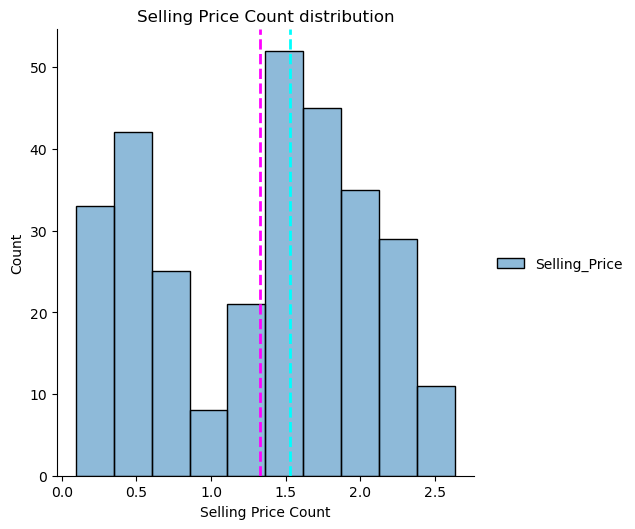

In [195]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.displot(np.log1p(file[dep_var]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(file['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(file['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [88]:
# Skew of the dependent variable after log transformation
np.log1p(file[dep_var]).skew()

Selling_Price   -0.222356
dtype: float64

In [90]:
X = file.drop('Selling_Price',axis=1)
y = np.log1p(file[dep_var])

In [92]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [94]:
features = [i for i in file.columns if i not in ['Selling_Price']]

In [96]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(file[features])

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [100]:
y_train.value_counts()

Selling_Price
1.526056         11
0.470004          6
0.371564          6
0.182322          5
1.609438          5
                 ..
1.294727          1
1.266948          1
1.208960          1
1.131402          1
2.602690          1
Name: count, Length: 116, dtype: int64

## Model Training

In [103]:
def evaluate_model(model, y_test, y_pred):
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)
    
  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [105]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [107]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_li = reg.predict(X_test)

In [109]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [111]:
score

,Linear regression
MSE,4.169925
RMSE,2.042039
MAE,1.289149
Train R2,0.642142
Test R2,0.492442
Adjusted R2,0.421769


#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
reg = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [115]:
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873664


In [117]:
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred_li2 = best_reg.predict(X_test)

In [121]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [123]:
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

For untuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For tuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For Both tuned and untuned model, **no improvement** is seen.

### ML Model - 2 : Random Forest

In [130]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train.values.ravel())
y_pred_rf1 = rf.predict(X_test)

In [132]:
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

MSE : 0.5686494969625685
RMSE : 0.7540885206410243
MAE : 0.4947583987177409
Train R2 : 0.9852823123413166
Test R2 : 0.9307846698261996
Adjusted R2 :  0.9211470922070628


In [134]:
score

,Linear regression,Linear regression tuned,Random forest
MSE,4.169925,4.169925,0.568649
RMSE,2.042039,2.042039,0.754089
MAE,1.289149,1.289149,0.494758
Train R2,0.642142,0.642142,0.985282
Test R2,0.492442,0.492442,0.930785
Adjusted R2,0.421769,0.421769,0.921147


Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 93% respectively, which seems to be a good model for prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [141]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train.values.ravel())
rf_best_params = rf_gridsearch.best_params_

In [143]:
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [145]:
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [149]:
rf_model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [151]:
y_pred_rf = rf_model.predict(X_test)

In [153]:
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

MSE : 2.1598547137265687
RMSE : 1.4696444174447671
MAE : 1.010518309341
Train R2 : 0.7710484475746358
Test R2 : 0.7371050920882741
Adjusted R2 :  0.7004994719992996


GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

In [155]:
score

,Linear regression,Linear regression tuned,Random forest,Random forest tuned
MSE,4.169925,4.169925,0.568649,2.159855
RMSE,2.042039,2.042039,0.754089,1.469644
MAE,1.289149,1.289149,0.494758,1.010518
Train R2,0.642142,0.642142,0.985282,0.771048
Test R2,0.492442,0.492442,0.930785,0.737105
Adjusted R2,0.421769,0.421769,0.921147,0.700499


After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use this model.

### ML Model - 6 : Gradient Boosting Regressor

In [161]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train,y_train.values.ravel())
y_pred_gb1 = gb.predict(X_test)

In [163]:
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

MSE : 0.7834226536964246
RMSE : 0.8851116617107836
MAE : 0.5454911452882067
Train R2 : 0.9878401898231808
Test R2 : 0.9046427405090938
Adjusted R2 :  0.8913651474154233


In [165]:
score

,Linear regression,Linear regression tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,4.169925,4.169925,0.568649,2.159855,0.783423
RMSE,2.042039,2.042039,0.754089,1.469644,0.885112
MAE,1.289149,1.289149,0.494758,1.010518,0.545491
Train R2,0.642142,0.642142,0.985282,0.771048,0.987840
Test R2,0.492442,0.492442,0.930785,0.737105,0.904643
Adjusted R2,0.421769,0.421769,0.921147,0.700499,0.891365


Using Gradient Boosting Regressor i have got accuracy around 98% and 90% on train and test data respectively, which is less than random forest, decision tree algorithm.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [171]:
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train.values.ravel())

gb_best_params = random_search.best_params_

C:\Users\armaa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [173]:
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 21, 'max_depth': 14}

In [175]:
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [179]:
gb_model.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(max_depth=14, min_samples_leaf=21, n_estimators=300,
                          random_state=0)

In [183]:
y_pred_gb = gb_model.predict(X_test)

In [185]:
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

MSE : 0.9661007064474811
RMSE : 0.9829042203833908
MAE : 0.6291755682620734
Train R2 : 0.961140887193467
Test R2 : 0.8824073884966332
Adjusted R2 :  0.8660337337303416


Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [187]:
score

,Linear regression,Linear regression tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,4.169925,4.169925,0.568649,2.159855,0.783423,0.966101
RMSE,2.042039,2.042039,0.754089,1.469644,0.885112,0.982904
MAE,1.289149,1.289149,0.494758,1.010518,0.545491,0.629176
Train R2,0.642142,0.642142,0.985282,0.771048,0.987840,0.961141
Test R2,0.492442,0.492442,0.930785,0.737105,0.904643,0.882407
Adjusted R2,0.421769,0.421769,0.921147,0.700499,0.891365,0.866034


After using the Randomised search CV, it gave accuracy 96% on train data & 88% on test data which is comparatively less than the untuned model.

### Plot R2 scores for each model

In [189]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned'],
      dtype='object')

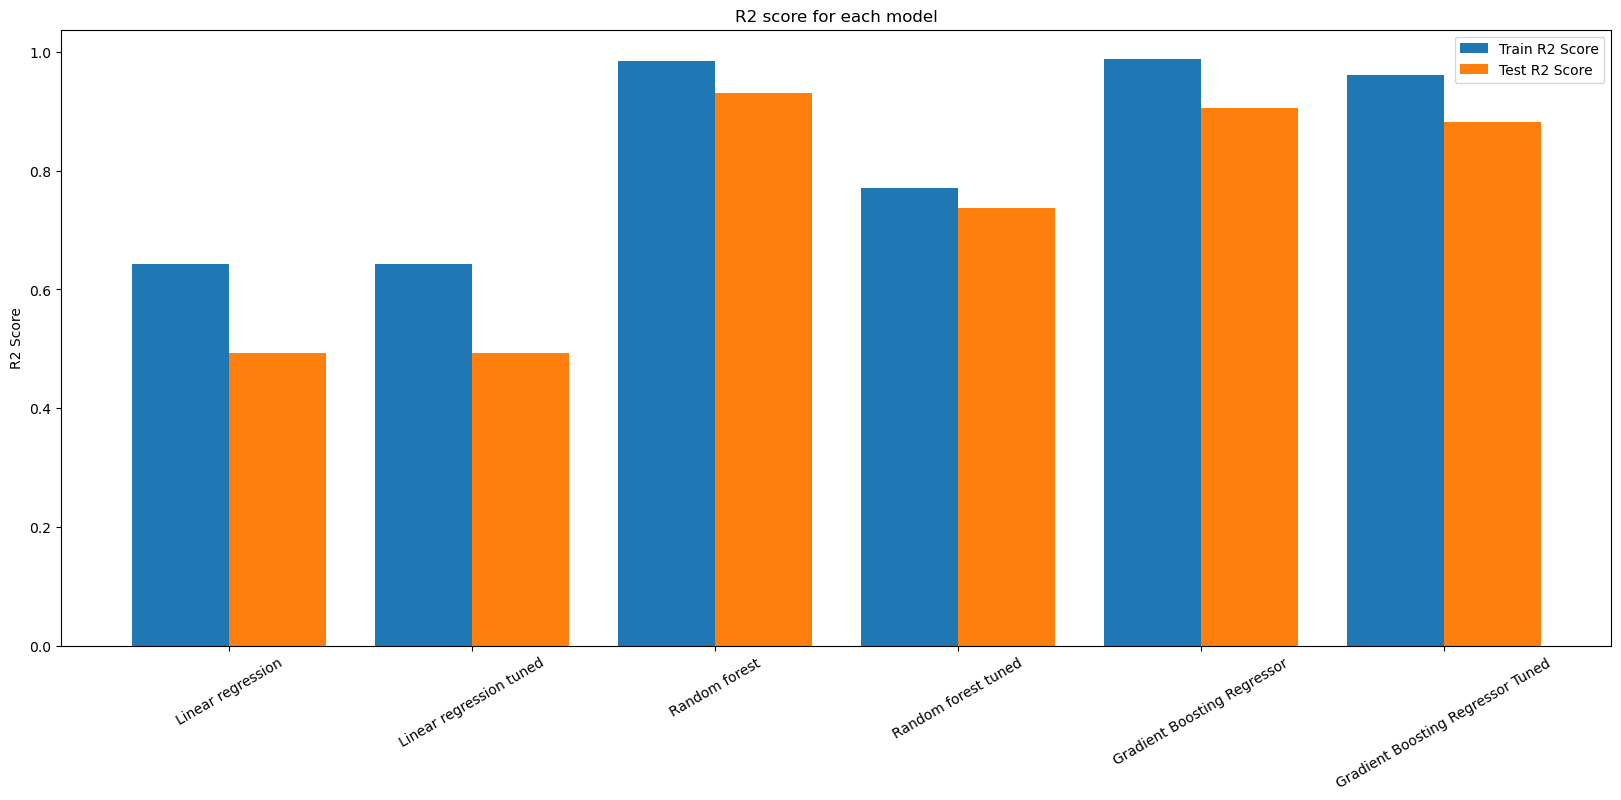

In [191]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected random forest model as i achieved 98% training accuracy and 93% testing accuracy. Some models were overfitted so i did not consider them.

In [193]:
import pickle
# Save the model to a pickle file
with open("random_forest_regression_model.pkl", "wb") as f:
  pickle.dump(rf, f)